In [1]:
from IPython.display import YouTubeVideo, Image
import warnings
warnings.filterwarnings('ignore')

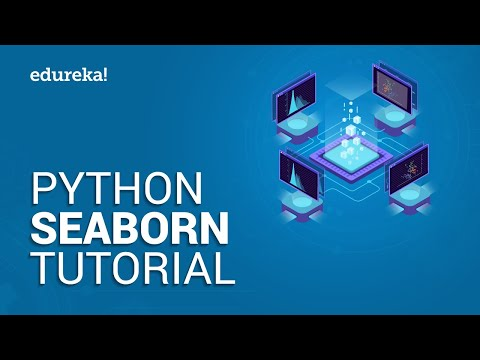

In [2]:
YouTubeVideo(id='TLdXM0A7SR8', width=900, height=400)

---

# `seaborn`

In [3]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Declare a pre-difinerd style
# you can define your own style
plt.style.use('fivethirtyeight')

# Useful for plots to display in cells
%matplotlib inline

## What is seaborn?

[Seaborn](https://seaborn.pydata.org/) is a library specially built for data visualization in python. It is like the plotting functions of pandas built on top of matplotlib. It has a lot of nice features for easy visualization and styling.

## What is the difference between categorical, ordinal and numerical variables?

### Categorical

A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.  For example, gender is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories.  Hair color is also a categorical variable having a number of categories (blonde, brown, brunette, red, etc.) and again, there is no agreed way to order these from highest to lowest.  A purely categorical variable is one that simply allows you to assign categories but you cannot clearly order the categories.  If the variable has a clear ordering, then that variable would be an ordinal variable, as described below.

### Ordinal

An ordinal variable is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the categories.  For example, suppose you have a variable, economic status, with three categories (low, medium and high).  In addition to being able to classify people into these three categories, you can order the categories as low, medium and high. Now consider a variable like educational experience (with values such as elementary school graduate, high school graduate, some college and college graduate). These also can be ordered as elementary school, high school, some college, and college graduate.  Even though we can order these from lowest to highest, the spacing between the values may not be the same across the levels of the variables. Say we assign scores 1, 2, 3 and 4 to these four levels of educational experience and we compare the difference in education between categories one and two with the difference in educational experience between categories two and three, or the difference between categories three and four. The difference between categories one and two (elementary and high school) is probably much bigger than the difference between categories two and three (high school and some college).  In this example, we can order the people in level of educational experience but the size of the difference between categories is inconsistent (because the spacing between categories one and two is bigger than categories two and three).  If these categories were equally spaced, then the variable would be an numerical variable.

### Numerical

An numerical variable is similar to an ordinal variable, except that the intervals between the values of the numerical variable are equally spaced.  For example, suppose you have a variable such as annual income that is measured in dollars, and we have three people who make (10,000), (15,000) and (20,000). The second person makes (5,000) more than the first person and (5,000) less than the third person, and the size of these intervals is the same.  If there were two other people who make (90,000) and (95,000), the size of that interval between these two people is also the same (5,000).

---

# Applying the seaborn visualization to a movies rating dataset

### Reading dataset

In [4]:
movie = pd.read_csv('movie_raitings.csv')
movie.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
# let's check the columns name
movie.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
# We see that there are column names with spaces, 
# which can be tedious when calling these names.
# let's change them
movie.columns = ['film', 'genre', 'critic_rating',\
                'audience_rating', 'budget', 'year']
movie.head()

,film,genre,critic_rating,audience_rating,budget,year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
# let's explore movie dataframe and 
# see the types of each column
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   film             559 non-null    object
 1   genre            559 non-null    object
 2   critic_rating    559 non-null    int64 
 3   audience_rating  559 non-null    int64 
 4   budget           559 non-null    int64 
 5   year             559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [8]:
# we can see that film and genre 
#are of type object whereas they are of type category
movie.loc[:,'genre'].unique()

array(['Comedy', 'Adventure', 'Action', 'Horror', 'Drama', 'Romance',
       'Thriller'], dtype=object)

In [9]:
movie.loc[:,'genre'].nunique()

7

In [10]:
# for example genre contains 7 different categories
# also we see that the column year is of type int64 
# whereas it should be of type category
movie.describe()

,critic_rating,audience_rating,budget,year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [11]:
# there is no point in the year variable
# having an average and quantiles
# let's make a change:

movie.loc[:, 'film'] = movie.loc[:,'film'].astype('category')
movie.loc[:, 'genre'] = movie.loc[:, 'genre'].astype('category')
movie.loc[:, 'year'] = movie.loc[:,'year'].astype('category')

# we can proceed as follows but it is not recommended
# movie.film = movie.film.astype('category')

In [12]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   film             559 non-null    category
 1   genre            559 non-null    category
 2   critic_rating    559 non-null    int64   
 3   audience_rating  559 non-null    int64   
 4   budget           559 non-null    int64   
 5   year             559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [13]:
movie.describe()

,critic_rating,audience_rating,budget
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


---

### `countplot`

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for `barplot()`, so you can compare counts across nested variables.

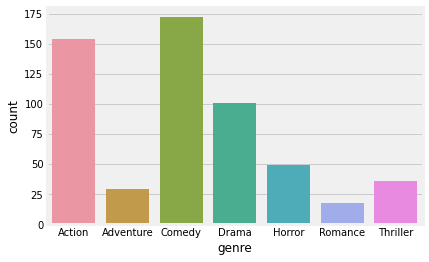

In [14]:
ax = sns.countplot(movie.loc[:, 'genre'])

### `jointplot`

Draw a plot of two variables with bivariate and univariate graphs.

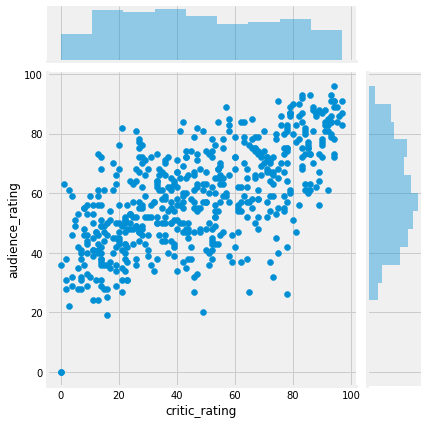

In [15]:
j = sns.jointplot(data=movie, x='critic_rating', y='audience_rating')

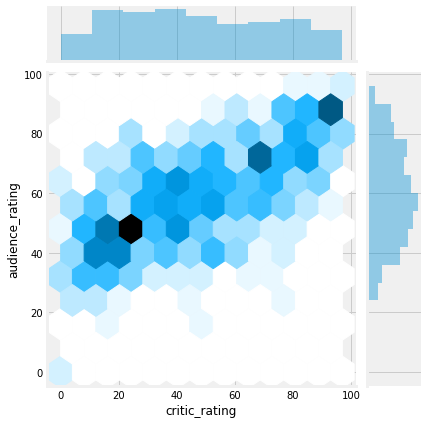

In [16]:
# we can change the style of the joint
j = sns.jointplot(data=movie, x='critic_rating', y='audience_rating', kind='hex')

### `Histograms`

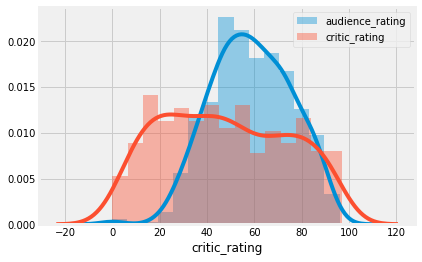

In [17]:
sns.distplot(movie.loc[:,'audience_rating'], bins=15, label='audience_rating')
sns.distplot(movie.loc[:,'critic_rating'], bins=15, label='critic_rating')
plt.legend()
plt.show()

#### Stacked histograms

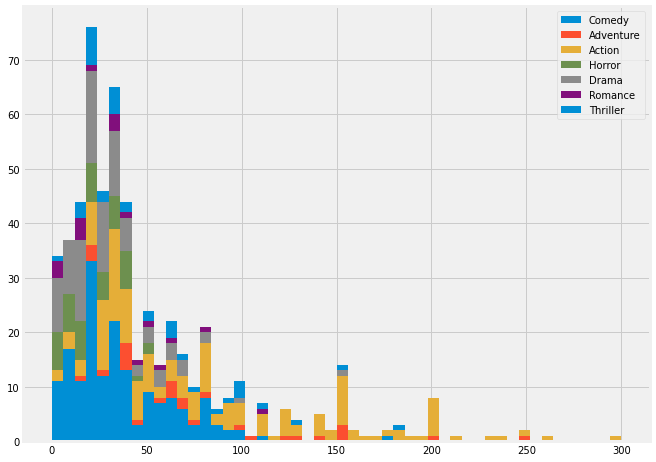

In [18]:
# Let's compare the income of the movies by genre
lst = []
labels = []
for genre in movie.loc[:, 'genre'].unique():
    lst.append(movie.loc[movie.loc[:,'genre']==genre, 'budget'])
    labels.append(genre)
plt.figure(figsize=(10,8))
plt.hist(lst, bins=50, stacked=True, rwidth=1, label=labels)
plt.legend()
plt.show()

### `kdeplot`

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

<AxesSubplot:xlabel='critic_rating', ylabel='audience_rating'>

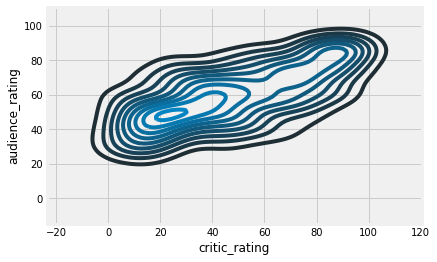

In [19]:
sns.kdeplot(movie.loc[:,'critic_rating'], movie.loc[:, 'audience_rating'])

### `violinplot`

<AxesSubplot:xlabel='year', ylabel='critic_rating'>

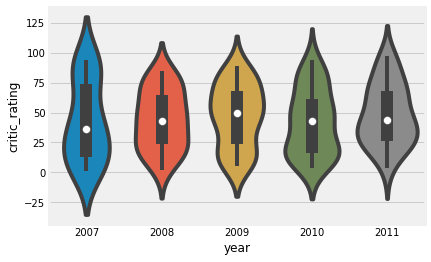

In [20]:
comedy = movie.loc[movie.loc[:,'genre']=='Comedy',:]
sns.violinplot(data=comedy, x='year', y='critic_rating')

### Creating a `FacetGrid`

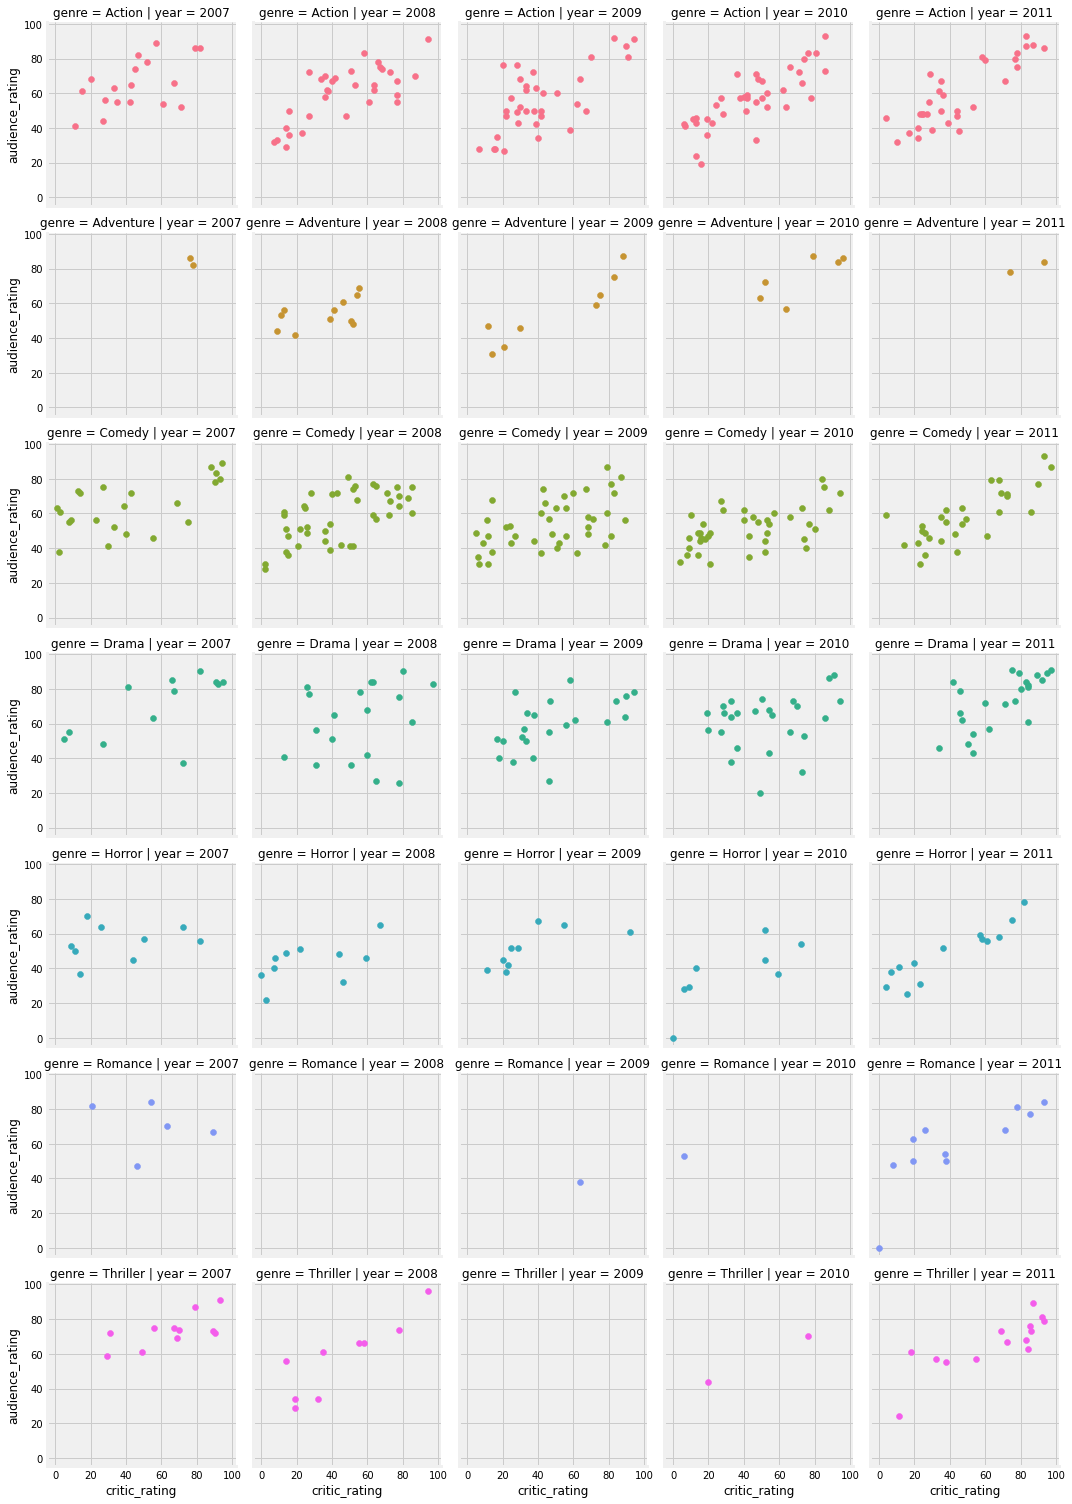

In [21]:
sns.FacetGrid(movie, row='genre', col='year', hue='genre')\
.map(plt.scatter, 'critic_rating','audience_rating')

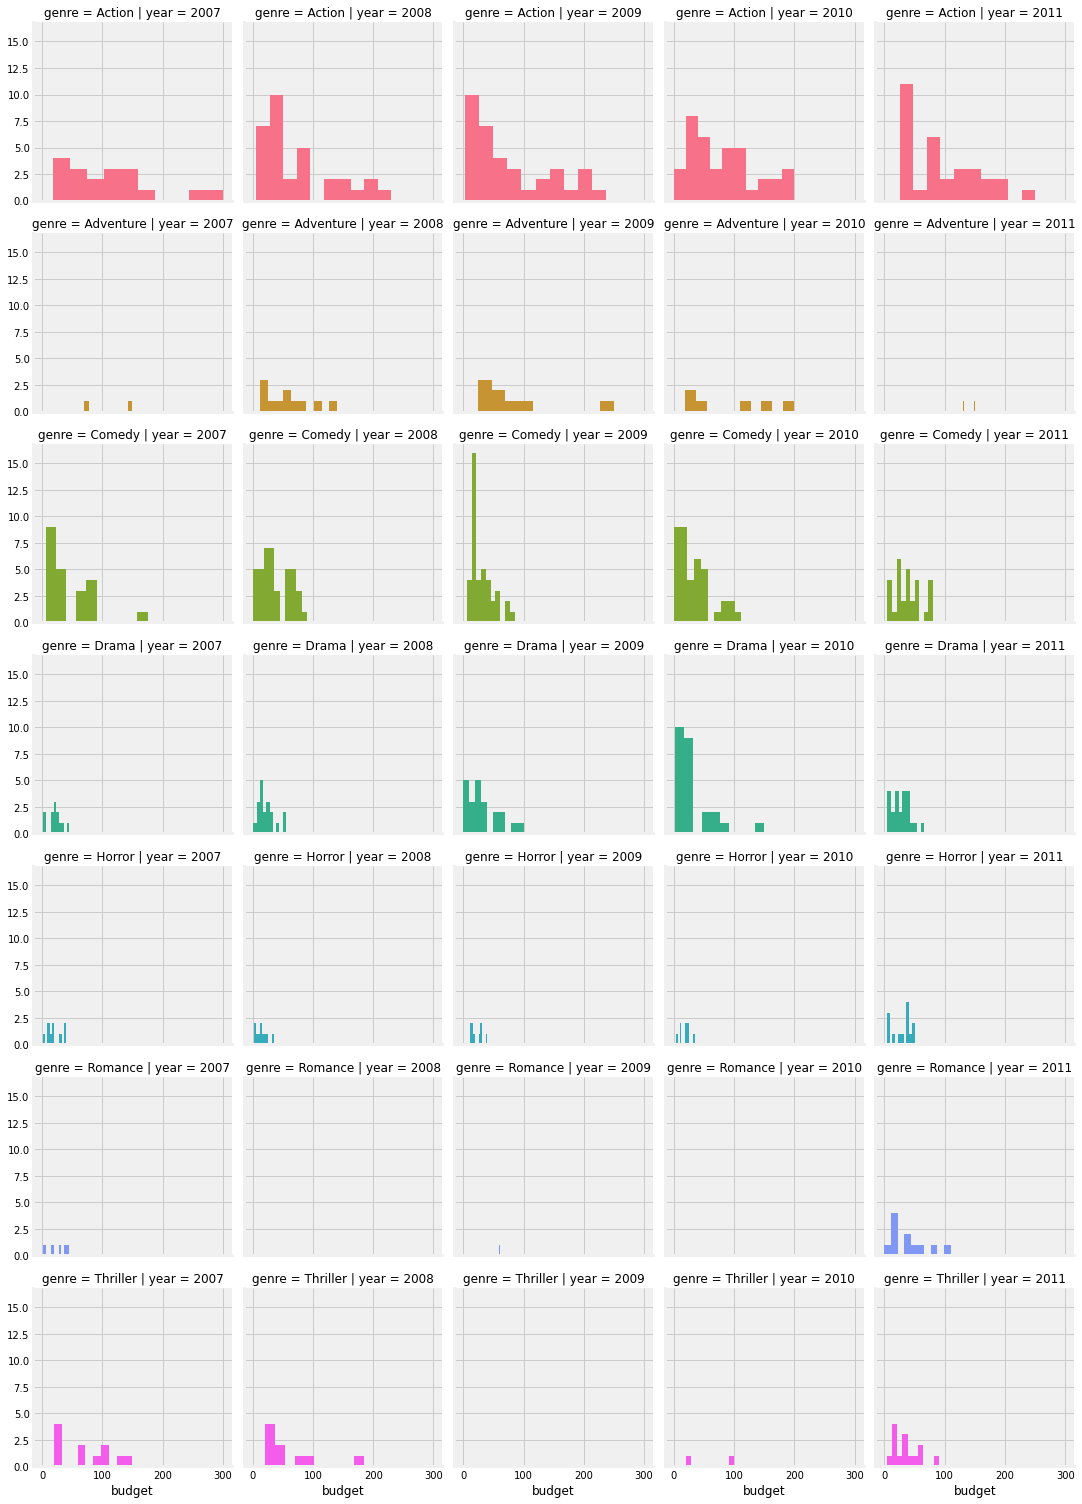

In [22]:
# can populate with any type of chart. Example: histograms
sns.FacetGrid(movie, row='genre', col='year', hue='genre')\
.map(plt.hist, 'budget')